In [ ]:
### Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import networkx as nx
import heapq
import time
from utils_discrete import GraphConstructionDiscretization, biobjective_search, extract_costs, check_pareto_optimality, plot_costs, reconstruct_solution_paths

In [ ]:
# =============================================================================
# Constants, UAV parameters, and initial conditions
# =============================================================================
# Define QZ circles as tuples (x, y, radius, only_electric_radius, risk_limit, toggle_only_electric_or_no_path) toggle_only_electric_or_no_path = 0 for no path, 1 for only electric

# Map with two QZ circles
map_qz = [(0.0, 0.0, 6.0, 2.0, 30, 1), (12.0, 10.0, 4.0, 1.5, 30, 1)]
# max_risk_limit = 2 / 3 * sum([circle[-2] for circle in map_qz]) ### Total risk limit i.e. limit on the sum of all the risk limits
# acceptable_risk_limit = 1 / 3 * sum([circle[-2] for circle in map_qz])
start = (-5, -5)       # Starting point
goal = (15, 15)        # Goal point

# UAV characteristics
alpha = 10                      ### Discharge rate 
recharge_factor = 2             ### Factor by which recharge rate less than discharge rate
beta = alpha / recharge_factor  ### Recharge rate

q_min, q_max, q_act = 20, 100, 70 ### Minimum SOC limit, maximum SOC limit, and SOC at the state
discretization_angle = 10         ### Discretization angle for QZ in degrees

The time req for grap construction: 0.5780339241027832
The time req for biobjective_search: 0.5083582401275635
Dominated solution indices: []


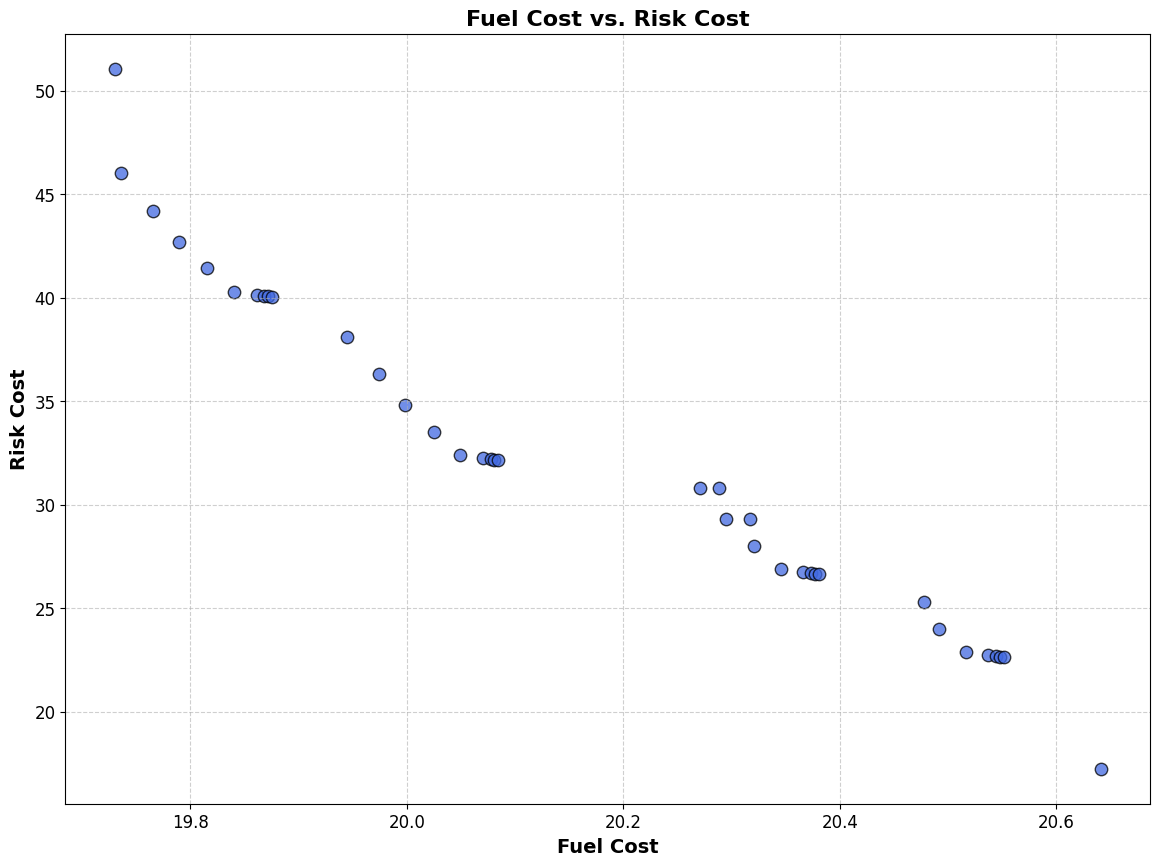

In [ ]:
# =============================================================================
# Graph Construction and Node Creation
# =============================================================================

# Instantiate the graph construction object.
graph_object = GraphConstructionDiscretization(map_qz, start, goal, q_min, q_max, q_act, alpha, beta, discretization_angle, max_risk_limit, acceptable_risk_limit)

start_time = time.time()

# Create nodes and the index maps. 
nodes, index_map, reverse_index_map = graph_object.create_nodes()

# Build the visibility graph
graph_object.build_visibility_graph(reverse_index_map)
end_time = time.time()

print(f"The time req for grap construction: {end_time-start_time}")
# Assign heuristic cost to each node
graph_object.assign_heuristic_costs(reverse_index_map)

# Run the biobjective search
start_state = "s"
goal_state = "g"

start_time = time.time()
sols, g2_min = biobjective_search(graph_object, start_state, goal_state, reduce_factor=1)
end_time = time.time()
print(f"The time req for biobjective_search: {end_time-start_time}")
# =============================================================================
# Pareto Optimality Check and Plotting
# =============================================================================

# Extract cost values for the goal state
fuel_costs, risk_costs = extract_costs(sols, goal_state)

# Check Pareto optimality
dominated_indices = check_pareto_optimality(fuel_costs, risk_costs)
print("Dominated solution indices:", dominated_indices)

# Plot the results
plot_costs(fuel_costs, risk_costs)

In [22]:

# Reconstruct and print all solution paths
solution_paths = reconstruct_solution_paths(sols, start_state, goal_state)
print("Extracted Solution Paths:")
for spath in solution_paths:
    print(spath)

example_path = ['s', 22, 11, 53, 48, 'g', (20.3207009673128, 28.0246597023148)]

# =============================================================================
# End of Pipeline
# =============================================================================

Extracted Solution Paths:
['s', 24, 11, 56, 46, 'g', (19.7300198876420, 51.0556088791319)]
['s', 24, 11, 55, 47, 'g', (19.7357037401885, 46.0060667612676)]
['s', 24, 11, 54, 47, 'g', (19.7654589379766, 44.2053512498739)]
['s', 24, 11, 54, 48, 'g', (19.7894084949527, 42.7034553852281)]
['s', 24, 11, 53, 48, 'g', (19.8154836382246, 41.4168768936494)]
['s', 24, 11, 53, 49, 'g', (19.8400140576704, 40.2859557059352)]
['s', 24, 11, 53, 50, 49, 'g', (19.8611054951345, 40.1383406384294)]
['s', 24, 11, 53, 51, 49, 'g', (19.8681538550474, 40.0903558793858)]
['s', 24, 11, 53, 52, 50, 49, 'g', (19.8716914967988, 40.0672150548325)]
['s', 24, 11, 53, 52, 51, 50, 49, 'g', (19.8752291385502, 40.0440742302791)]
['s', 23, 11, 55, 47, 'g', (19.9448637895504, 38.1013510206020)]
['s', 23, 11, 54, 47, 'g', (19.9746189873385, 36.3006355092082)]
['s', 23, 11, 54, 48, 'g', (19.9985685443146, 34.7987396445625)]
['s', 23, 11, 53, 48, 'g', (20.0246436875865, 33.5121611529838)]
['s', 23, 11, 53, 49, 'g', (20.04917

In [23]:
graph_object.visibility_graph[53][48]

{'node_i_info': (8.935822227524088, 12.571150438746159, 2, 70),
 'node_j_info': (12.0, 14.0, 2, 70),
 'line_segment': {'g': (0, 0.6666666666666666), 'e': (0.6666666666666666, 1)},
 'fuel_cost': 2.2539640626170625,
 'risk_cost': 4.86128013616286,
 'feasibility': True,
 'edge_type': 'internal'}

In [24]:
from matplotlib.patches import Circle

def plot_map_circle(graph_object, Map_qz, start, goal, path, reverse_index_map):
    fig, ax = plt.subplots()
    fig.set_size_inches(20, 10)
    
    ### find the min and max x and y values, for axis limit 
    min_x = min( [min(Map_qz, key=lambda x: x[0]-x[2])[0] - min(Map_qz, key=lambda x: x[0]-x[2])[2], start[0], goal[0]] )
    max_x = max( [max(Map_qz, key=lambda x: x[0]+x[2])[0] + max(Map_qz, key=lambda x: x[0]+x[2])[2], start[0], goal[0]] )
    min_y = min( [min(Map_qz, key=lambda x: x[1]-x[2])[1] - min(Map_qz, key=lambda x: x[1]-x[2])[2], start[1], goal[1]] )
    max_y = max( [max(Map_qz, key=lambda x: x[1]+x[2])[1] + max(Map_qz, key=lambda x: x[1]+x[2])[2], start[1], goal[1]] )
    
    path_coordinates = []
    path_coordinates_gas = []
    path_coordinates_electric = []
    for path_index in range(len(path) - 2): # for each node in the path:
        i = path[path_index]
        j = path[path_index + 1]
        info_graph = graph_object.visibility_graph[i][j]
        node_i_coor = np.array(info_graph['node_i_info'][:2])
        node_j_coor = np.array(info_graph['node_j_info'][:2])
        for line_segment_type, line_segment_value in info_graph['line_segment'].items():
            if line_segment_type[0] == 'g':
                temp_coor_1 = list(node_i_coor + line_segment_value[0] * (node_j_coor - node_i_coor))
                temp_coor_2 = list(node_i_coor + line_segment_value[1] * (node_j_coor - node_i_coor))
                result = [list(pair) for pair in zip(temp_coor_1, temp_coor_2)]
                path_coordinates_gas.append(result)
            elif line_segment_type[0] == 'e':
                temp_coor_1 = list(node_i_coor + line_segment_value[0] * (node_j_coor - node_i_coor))
                temp_coor_2 = list(node_i_coor + line_segment_value[1] * (node_j_coor - node_i_coor))
                result = [list(pair) for pair in zip(temp_coor_1, temp_coor_2)]
                path_coordinates_electric.append(result)
    
    ### Draw the path
    for path_coor in path_coordinates_gas:
        ax.plot(path_coor[0], path_coor[1], 'r')
    for path_coor in path_coordinates_electric:
        ax.plot(path_coor[0], path_coor[1], 'g')
    
    for circle_info in Map_qz:
        # Create a circle patch
        circle_outer = Circle((circle_info[0], circle_info[1]), radius=circle_info[2], fill=True, facecolor=(0, 0, 1, 0.2), edgecolor='blue', linewidth=2, zorder=1)
        circle_inner = Circle((circle_info[0], circle_info[1]), radius=circle_info[3], fill=True, facecolor=(0, 0, 0, 0.5), edgecolor='black', linewidth=2, zorder=2)

        # Add the circle to the Axes
        ax.add_patch(circle_inner)
        ax.add_patch(circle_outer)

    
    # Set equal aspect so circles look circular
    ax.set_aspect('equal', 'box')        
    
    # Set axis limits
    ax.set_xlim(min_x - (max_x - min_x)/10, max_x + (max_x - min_x)/10)
    ax.set_ylim(min_y - (max_y - min_y)/10, max_y + (max_y - min_y)/10)

    # Plot the start and goal points
    ax.plot(start[0], start[1], 'ro', label='Start')
    ax.plot(goal[0], goal[1], 'go', label='Goal')

    # Add a legend
    ax.legend()
    plt.title("Circle Using Patches")
    plt.grid()
    plt.show()

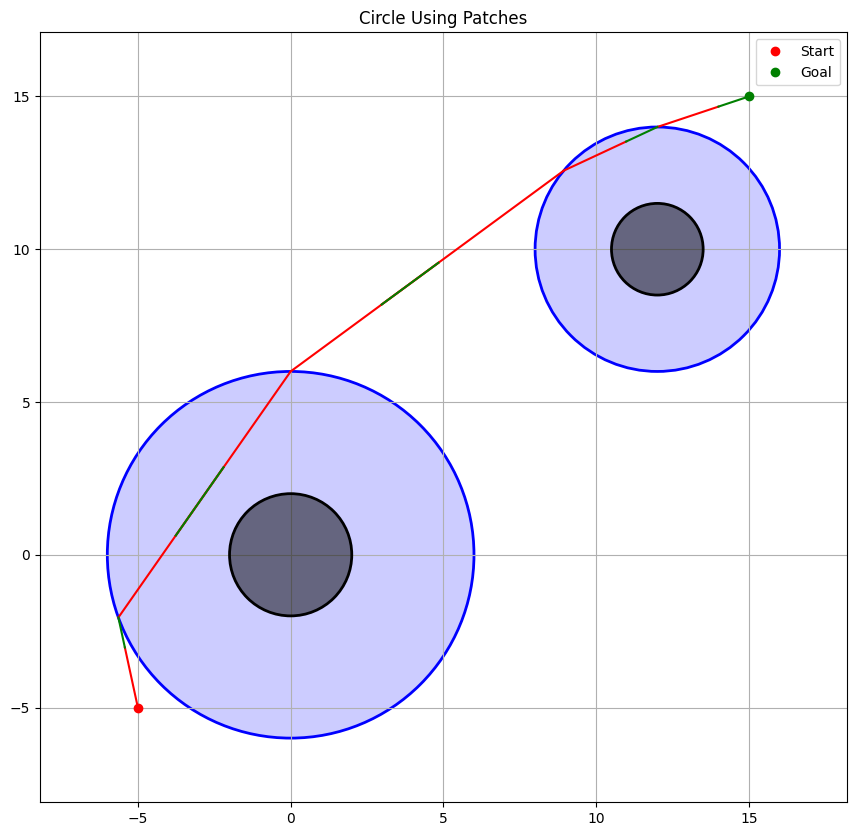

In [25]:
plot_map_circle(graph_object, map_qz, start, goal, example_path, reverse_index_map)

In [26]:
##### Doing a single objective search with weigth objective
scale_fuel_cost = 40
scale_risk_cost = 60

# =============================================================================
# Graph Construction and Node Creation
# =============================================================================

# Instantiate the graph construction object.
# (Assuming you have already refactored your class into GraphConstructionDiscretization.)
graph_object = GraphConstructionDiscretization(
    map_qz, start, goal, q_min, q_max, q_act, alpha, beta, discretization_angle, max_risk_limit, acceptable_risk_limit
)

start_time = time.time()
# Create nodes and the index maps.
nodes, index_map, reverse_index_map = graph_object.create_nodes()

# Build the visibility graph
graph_object.build_visibility_graph(reverse_index_map)
end_time = time.time()

print(f"The time req for grap construction: {end_time-start_time}")
# Assign heuristic cost to each node
graph_object.assign_heuristic_costs(reverse_index_map)

def heuristic(n1,n2):
    return graph_object.visibility_graph.nodes[n1]['heuristic_cost']

# Run the biobjective search
start_state = "s"
goal_state = "g"
path_cost_fuel_list = []
path_cost_risk_list = []
for factor in np.arange(0,1,0.01):
    for edge_1, edge_2 in graph_object.visibility_graph.edges:
        graph_object.visibility_graph[edge_1][edge_2]['weight'] = factor*graph_object.visibility_graph[edge_1][edge_2]['fuel_cost'] + (1-factor)*graph_object.visibility_graph[edge_1][edge_2]['risk_cost']

    path = nx.astar_path(graph_object.visibility_graph, source=start_state, target=goal_state, heuristic=heuristic, weight='weight')
    print(path)
    path_cost_fuel = sum([graph_object.visibility_graph[path[i]][path[i+1]]['fuel_cost'] for i in range(len(path)-1)])
    path_cost_risk = sum([graph_object.visibility_graph[path[i]][path[i+1]]['risk_cost'] for i in range(len(path)-1)])
    
    path_cost_fuel_list.append(path_cost_fuel)
    path_cost_risk_list.append(path_cost_risk)
    print(f"factor: {factor}, path_cost_fuel: {path_cost_fuel}, path_cost_risk: {path_cost_risk}")

The time req for grap construction: 0.560605525970459
['s', 27, 28, 29, 30, 31, 35, 70, 71, 72, 73, 74, 39, 40, 41, 'g']
factor: 0.0, path_cost_fuel: 22.370335590267, path_cost_risk: 10.9255417668680
['s', 27, 28, 29, 30, 31, 35, 70, 71, 72, 73, 74, 39, 40, 41, 'g']
factor: 0.01, path_cost_fuel: 22.370335590267, path_cost_risk: 10.9255417668680
['s', 27, 28, 29, 30, 31, 35, 70, 71, 72, 73, 74, 39, 40, 41, 'g']
factor: 0.02, path_cost_fuel: 22.370335590267, path_cost_risk: 10.9255417668680
['s', 27, 28, 29, 30, 31, 35, 70, 71, 72, 73, 74, 39, 40, 41, 'g']
factor: 0.03, path_cost_fuel: 22.370335590267, path_cost_risk: 10.9255417668680
['s', 27, 28, 29, 30, 31, 35, 70, 71, 72, 73, 74, 39, 40, 41, 'g']
factor: 0.04, path_cost_fuel: 22.370335590267, path_cost_risk: 10.9255417668680
['s', 22, 21, 20, 19, 18, 14, 12, 11, 53, 52, 51, 50, 49, 'g']
factor: 0.05, path_cost_fuel: 21.438806391173603, path_cost_risk: 10.0717951671836
['s', 22, 21, 20, 19, 18, 14, 12, 11, 53, 52, 51, 50, 49, 'g']
fac

In [27]:
dominated_indices = check_pareto_optimality(path_cost_fuel_list, path_cost_risk_list)

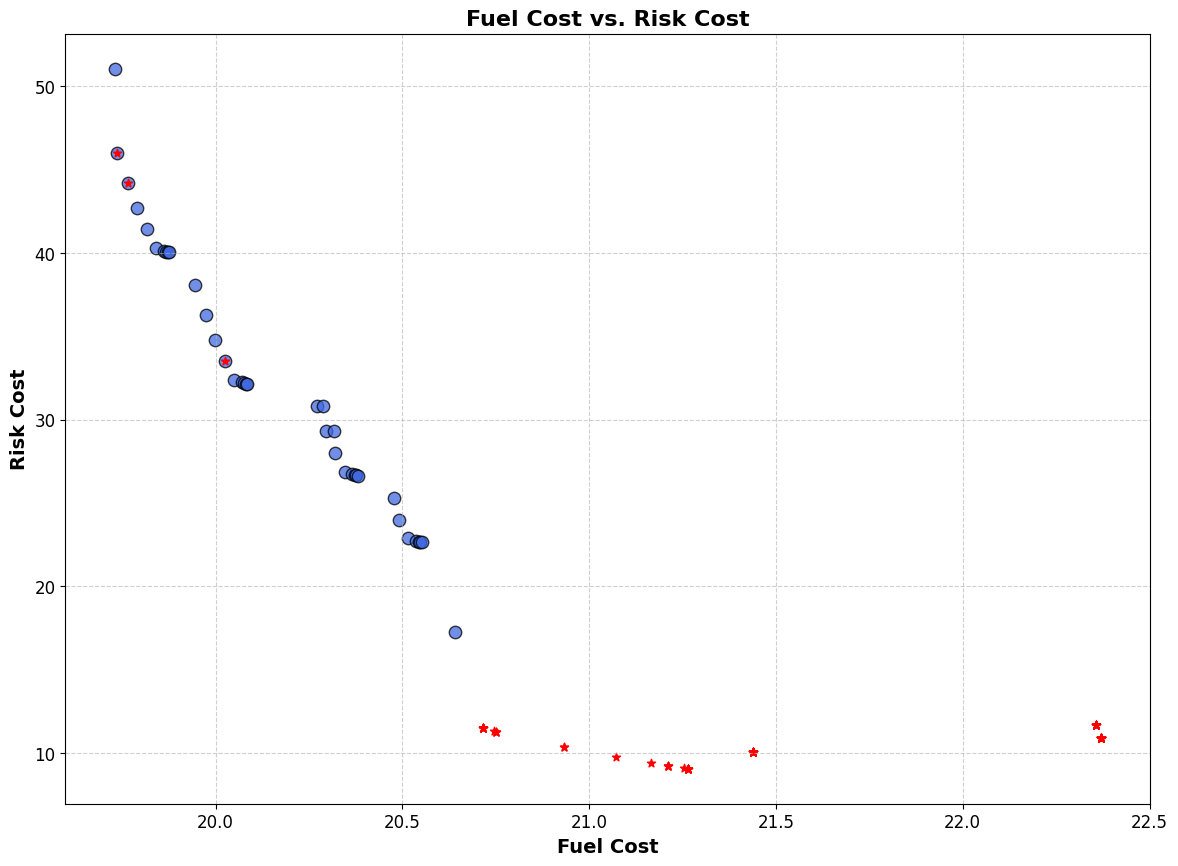

In [28]:
plt.figure(figsize=(14, 10))
plt.scatter(fuel_costs, risk_costs, color='royalblue', edgecolors='black',
            alpha=0.75, s=80)
plt.scatter(path_cost_fuel_list, path_cost_risk_list, color='red', marker='*')
plt.xlabel("Fuel Cost", fontsize=14, fontweight='bold')
plt.ylabel("Risk Cost", fontsize=14, fontweight='bold')
plt.title("Fuel Cost vs. Risk Cost", fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [29]:
# import random
# ##### Plotting the solution path for which passes thru certain state
# plt.figure(figsize=(14, 10))
# random.seed(42)
# colors = ["#" + ''.join([random.choice('0123456789ABCDEF') for _ in range(6)]) for _ in range(len(paths_with_22_xy))]

# for i, path in enumerate(paths_with_22_xy):
#     x, y = zip(*path)
#     plt.plot(x, y, marker='o', linestyle='-', color=colors[i], label=f'{float(paths_with_22[i][-1][0]):.2f},{float(paths_with_22[i][-1][1]):.2f}')

# for x_c, y_c, r in Map_qz:
#     circle = plt.Circle((x_c, y_c), r, color='gray', alpha=0.3, fill=True)
#     plt.gca().add_patch(circle)

# ### Start and goal points
# plt.scatter(start[0], start[0], color='black', marker='s', s=100, label='Start' )
# plt.scatter(goal[0], goal[0], color='red', marker='*', s=150, label='Goal')

# # Formatting
# plt.xlabel("X")
# plt.ylabel("Y")
# plt.legend()
# plt.axis("equal")  # Ensure aspect ratio is equal
# plt.grid(True)
# plt.title("Paths with Circles and Start/Goal Points")
# plt.show()